# Arabic Poem NLP

##### By: Mada Abudahish & Mozah Alkhaldi

In this project, we will develop an Arabic poems topic modeling to predict the correct phase of poems that can correctly classify the topic.

### Introduction

Arabic poems are the oldest and the most prominent form of Arabic literature today. Ancient Arabic poetry is probably the primary source for describing the social, political, and intellectual life in the Arab world.

### Data Description

The datase that will be used in this project has been downloaded from [here]( https://hci-lab.github.io/LearningMetersPoems/).the total number of terms is **1,831,770** poetic terms. Each terms is labeled by its **meter**, the poet who wrote it, and the **age** which it was written in. There are **22 meters**, **3701 poets and 11 ages**: Pre-Islamic, Islamic, Umayyad, Mamluk, Abbasid, Ayyubid, Ottoman, Andalusian, era between Umayyad and Abbasid, Fatimid, and finally the modern age.  It is important to note that the terms diacritic states are not consistent. This means that a term can carry full, semi diacritics, or it can carry nothing.

--------

In [1]:
#!pip install pyarabic
#!pip install wordcloud
#!pip install camel-tools
#!conda install gensim -y
#!pip install tashaphyne
#!pip install farasapy
#!pip install arabicnlp
#!pip install pyLDAvis

### Importing libreries

In [2]:
import csv

# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import string
import pyarabic.araby as araby
import pyarabic.number as number
from pyarabic.araby import strip_tashkeel
from pyarabic.araby import strip_harakat
from pyarabic.araby import strip_tatweel
from pyarabic.araby import normalize_hamza
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import re
from nltk.tokenize import word_tokenize
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF

###########################################################

import arabic_reshaper
from pyarabic.araby import tokenize
from pyarabic.unshape import unshaping_text
from pyarabic import araby
import matplotlib.pyplot as pPlot
from wordcloud import WordCloud, STOPWORDS
import numpy as npy
from PIL import Image
from matplotlib import pyplot as plt

from ar_wordcloud import ArabicWordCloud
from corextopic import corextopic as ct
import nltk
from nltk.corpus import stopwords
%matplotlib inline
from nltk import corpus
import nltk.corpus as Corpus
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import gensim
from gensim import corpora, models, similarities, matutils
from gensim.models import basemodel, ldamodel

/Users/mada/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


----

### Load Dataset

In [3]:
poem_data = pd.read_csv('Arabic_Poem.csv')
# read the data 

### use SQL to load dataset 

In [4]:
"""engine = create_engine('sqlite://', echo=False)

# run this to add the data to a table in the database
peom.to_sql("peom",con=engine)
poem=pd.read_sql('SELECT * FROM peom ;',engine)"""

'engine = create_engine(\'sqlite://\', echo=False)\n\n# run this to add the data to a table in the database\npeom.to_sql("peom",con=engine)\npoem=pd.read_sql(\'SELECT * FROM peom ;\',engine)'

In [5]:
# To display full text
pd.set_option('display.max_colwidth', -1)
poem_data

<ipython-input-5-8f6dd409389b>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,العصر,الشاعر,الديوان,القافية,البحر,الشطر الايسر,الشطر الايمن,البيت
0,قبل الإسلام,عمرو بنِ قُمَيئَة,الديوان الرئيسي,د,الطويل,وَأَن تَجمَعا شَملي وَتَنتَظِرا غَدا,خَليلَيَّ لا تَستَعجِلا أَن تَزَوَّدا,خَليلَيَّ لا تَستَعجِلا أَن تَزَوَّدا وَأَن تَجمَعا شَملي وَتَنتَظِرا غَدا
1,قبل الإسلام,عمرو بنِ قُمَيئَة,الديوان الرئيسي,د,الطويل,وَلا سُرعَتي يَوماً بِسابِقَةِ الرَدى,فَما لَبَثٌ يَوماً بِسابِقٍ مَغنَمٍ,فَما لَبَثٌ يَوماً بِسابِقٍ مَغنَمٍ وَلا سُرعَتي يَوماً بِسابِقَةِ الرَدى
2,قبل الإسلام,عمرو بنِ قُمَيئَة,الديوان الرئيسي,د,الطويل,وَتَستَوجِبا مَنّاً عَلَيَّ وَتُحمَدا,وَإِن تُنظِراني اليَومَ أَقضِ لُبانَةً,وَإِن تُنظِراني اليَومَ أَقضِ لُبانَةً وَتَستَوجِبا مَنّاً عَلَيَّ وَتُحمَدا
3,قبل الإسلام,عمرو بنِ قُمَيئَة,الديوان الرئيسي,د,الطويل,تُؤامِرُني سِرّاً لِأَصرِمَ مَرثَدا,لَعَمرُكَ ما نَفسٌ بِجِدٍ رَشيدَةٍ,لَعَمرُكَ ما نَفسٌ بِجِدٍ رَشيدَةٍ تُؤامِرُني سِرّاً لِأَصرِمَ مَرثَدا
4,قبل الإسلام,عمرو بنِ قُمَيئَة,الديوان الرئيسي,د,الطويل,وَأَفرَعَ في لَومي مِراراً وَأَصعَدا,وَإِن ظَهَرَت مِنهُ قَوارِصُ جَمَّةٌ,وَإِن ظَهَرَت مِنهُ قَوارِصُ جَمَّةٌ وَأَفرَعَ في لَومي مِراراً وَأَصعَدا
...,...,...,...,...,...,...,...,...
1831765,الحديث,شهاب غانم,شهاب غانم,ن,الخفيف,وأحلى قصيدة تَتَغنى,هي أغلى ما أنشأ اللَّه في الدنيا,هي أغلى ما أنشأ اللَّه في الدنيا وأحلى قصيدة تَتَغنى
1831766,الحديث,شهاب غانم,شهاب غانم,ن,الخفيف,كحلم يغشى الجفون الوسنى,هي أغرودة الأغاريد تنساب,هي أغرودة الأغاريد تنساب كحلم يغشى الجفون الوسنى
1831767,الحديث,شهاب غانم,شهاب غانم,ن,الخفيف,يتداعى وجداً ويخفق حسنا,هي شلال بهجة وبهاء,هي شلال بهجة وبهاء يتداعى وجداً ويخفق حسنا
1831768,الحديث,شهاب غانم,شهاب غانم,ن,الخفيف,يدك الحدود سجناً فسجنا,هي حلم الهوى ومنطلقي الباقي,هي حلم الهوى ومنطلقي الباقي يدك الحدود سجناً فسجنا


In [6]:
poem_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1831770 entries, 0 to 1831769
Data columns (total 8 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   العصر         object
 1   الشاعر        object
 2   الديوان       object
 3   القافية       object
 4   البحر         object
 5   الشطر الايسر  object
 6   الشطر الايمن  object
 7   البيت         object
dtypes: object(8)
memory usage: 111.8+ MB


In [8]:
#Checking DataFrame size
print(f"- The dataset containes {poem_data.shape[0]} rows with {poem_data.shape[1]} columns.")

- The dataset containes 1831770 rows with 8 columns.


------

## Clean Data

- Remove whitespace.
- Drop duplicates.
- Check null.
- Remove Unnecessary columns.
- Rename columns.

In [9]:
# Remove spaces at columns names
poem_data.columns = poem_data.columns.str.strip()
poem_data.columns

Index(['العصر', 'الشاعر', 'الديوان', 'القافية', 'البحر', 'الشطر الايسر',
       'الشطر الايمن', 'البيت'],
      dtype='object')

In [10]:
#Checking null values 
poem_data.isnull().sum()

العصر           0    
الشاعر          0    
الديوان         27   
القافية         9760 
البحر           92334
الشطر الايسر    57910
الشطر الايمن    43   
البيت           0    
dtype: int64

In [11]:
#Drop nulls values
poem_data.dropna(inplace= True)

In [12]:
#Checking duplicates rows and drop.
poem_data.drop_duplicates(keep="first", inplace=True)
poem_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1683815 entries, 0 to 1831769
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   العصر         1683815 non-null  object
 1   الشاعر        1683815 non-null  object
 2   الديوان       1683815 non-null  object
 3   القافية       1683815 non-null  object
 4   البحر         1683815 non-null  object
 5   الشطر الايسر  1683815 non-null  object
 6   الشطر الايمن  1683815 non-null  object
 7   البيت         1683815 non-null  object
dtypes: object(8)
memory usage: 115.6+ MB


In [13]:
poem_data.العصر.value_counts(normalize=True)

الحديث             0.397473
العباسي            0.137444
المملوكي           0.093887
العثماني           0.089711
الفاطمي            0.072905
الأيوبي            0.065716
المغرب والأندلس    0.063563
الأموي             0.036739
المخضرمين          0.017746
قبل الإسلام        0.012658
بين الدولتين       0.010889
الإسلامي           0.001267
Name: العصر, dtype: float64

## Distrbiution of العصر 

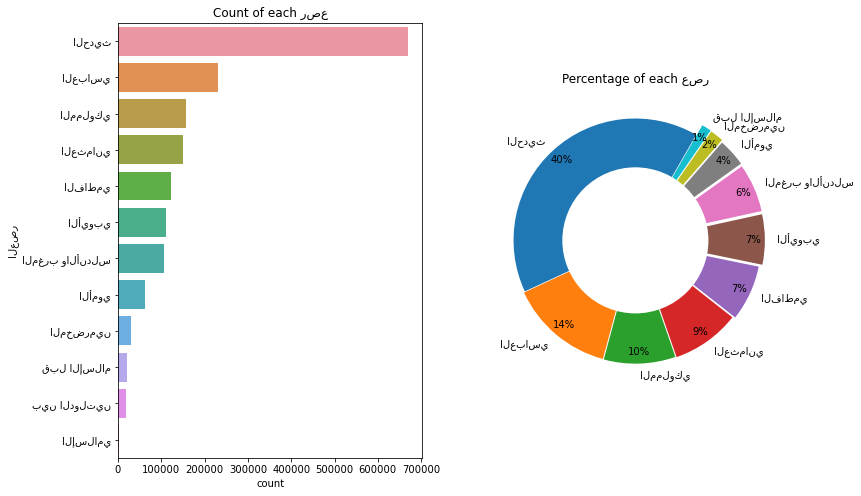

In [14]:
col = 'العصر'
grouped_df = pd.DataFrame(poem_data[col].value_counts())
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
explode = list((np.array(list(poem_data[col].dropna().value_counts()))/sum(list(poem_data[col].dropna().value_counts())))[::-1])
labels = list(grouped_df.index)
sizes = grouped_df[col]

ax2.pie(sizes[:10],  explode=explode[:10], startangle=60, labels=labels[:10],autopct='%1.0f%%', pctdistance=0.9)
ax2.add_artist(plt.Circle((0,0),0.6,fc='white'))
sns.countplot(y = col, data = poem_data, ax=ax1, order =labels)
ax1.set_title("Count of each رصع")
ax2.set_title("Percentage of each عصر")
plt.savefig("dd.png")
plt.show()

- #### There are 12 different عصر.
- #### "العصر الحديث" is the most frequent "عصر" in the dataset as they compose ~40% of the data each.

## Reduce classes to a select few

In [15]:
poem_data['target'] = poem_data['العصر'].apply(lambda x : x if x in ['الحديث','العباسي','المملوكي','العثماني','الفاطمي','الأيوبي'] else "القديم") 


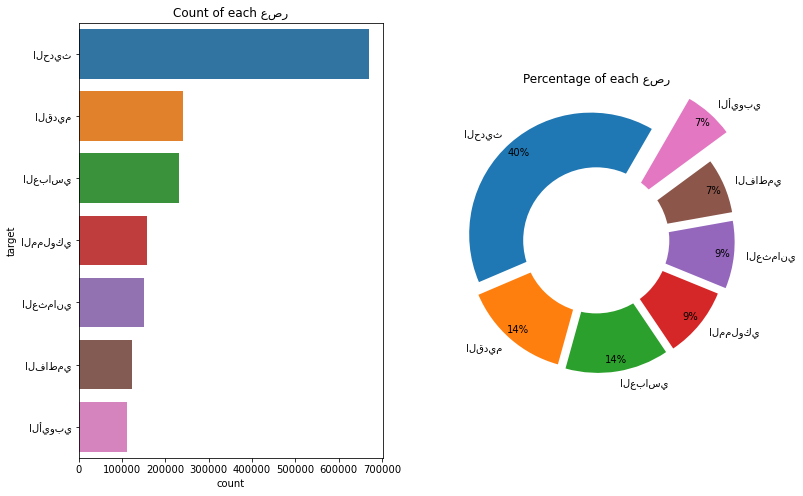

In [16]:
col = 'target'
grouped_df = pd.DataFrame(poem_data[col].value_counts())
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
explode = list((np.array(list(poem_data[col].dropna().value_counts()))/sum(list(poem_data[col].dropna().value_counts())))[::-1])
labels = list(grouped_df.index)
sizes = grouped_df[col]
ax2.pie(sizes[:10],  explode=explode[:10], startangle=60, labels=labels[:10],autopct='%1.0f%%', pctdistance=0.9)
ax2.add_artist(plt.Circle((0,0),0.6,fc='white'))
sns.countplot(y = col, data = poem_data, ax=ax1, order = labels)
ax1.set_title("Count of each عصر")
ax2.set_title("Percentage of each عصر")
plt.show()

In [17]:
grouped_df = pd.DataFrame(poem_data[col].value_counts())
grouped_df

,target
الحديث,669271
القديم,240555
العباسي,231431
المملوكي,158089
العثماني,151057
الفاطمي,122758
الأيوبي,110654


In [18]:
poem_data['char_length'] = poem_data['البيت'].apply(lambda x : len(x))
poem_data['token_length'] = poem_data['البيت'].apply(lambda x : len(x.split(" ")))

In [19]:
poem_data

,العصر,الشاعر,الديوان,القافية,البحر,الشطر الايسر,الشطر الايمن,البيت,target,char_length,token_length
0,قبل الإسلام,عمرو بنِ قُمَيئَة,الديوان الرئيسي,د,الطويل,وَأَن تَجمَعا شَملي وَتَنتَظِرا غَدا,خَليلَيَّ لا تَستَعجِلا أَن تَزَوَّدا,خَليلَيَّ لا تَستَعجِلا أَن تَزَوَّدا وَأَن تَجمَعا شَملي وَتَنتَظِرا غَدا,القديم,77,13
1,قبل الإسلام,عمرو بنِ قُمَيئَة,الديوان الرئيسي,د,الطويل,وَلا سُرعَتي يَوماً بِسابِقَةِ الرَدى,فَما لَبَثٌ يَوماً بِسابِقٍ مَغنَمٍ,فَما لَبَثٌ يَوماً بِسابِقٍ مَغنَمٍ وَلا سُرعَتي يَوماً بِسابِقَةِ الرَدى,القديم,76,13
2,قبل الإسلام,عمرو بنِ قُمَيئَة,الديوان الرئيسي,د,الطويل,وَتَستَوجِبا مَنّاً عَلَيَّ وَتُحمَدا,وَإِن تُنظِراني اليَومَ أَقضِ لُبانَةً,وَإِن تُنظِراني اليَومَ أَقضِ لُبانَةً وَتَستَوجِبا مَنّاً عَلَيَّ وَتُحمَدا,القديم,79,12
3,قبل الإسلام,عمرو بنِ قُمَيئَة,الديوان الرئيسي,د,الطويل,تُؤامِرُني سِرّاً لِأَصرِمَ مَرثَدا,لَعَمرُكَ ما نَفسٌ بِجِدٍ رَشيدَةٍ,لَعَمرُكَ ما نَفسٌ بِجِدٍ رَشيدَةٍ تُؤامِرُني سِرّاً لِأَصرِمَ مَرثَدا,القديم,73,12
4,قبل الإسلام,عمرو بنِ قُمَيئَة,الديوان الرئيسي,د,الطويل,وَأَفرَعَ في لَومي مِراراً وَأَصعَدا,وَإِن ظَهَرَت مِنهُ قَوارِصُ جَمَّةٌ,وَإِن ظَهَرَت مِنهُ قَوارِصُ جَمَّةٌ وَأَفرَعَ في لَومي مِراراً وَأَصعَدا,القديم,76,13
...,...,...,...,...,...,...,...,...,...,...,...
1831765,الحديث,شهاب غانم,شهاب غانم,ن,الخفيف,وأحلى قصيدة تَتَغنى,هي أغلى ما أنشأ اللَّه في الدنيا,هي أغلى ما أنشأ اللَّه في الدنيا وأحلى قصيدة تَتَغنى,الحديث,55,13
1831766,الحديث,شهاب غانم,شهاب غانم,ن,الخفيف,كحلم يغشى الجفون الوسنى,هي أغرودة الأغاريد تنساب,هي أغرودة الأغاريد تنساب كحلم يغشى الجفون الوسنى,الحديث,51,11
1831767,الحديث,شهاب غانم,شهاب غانم,ن,الخفيف,يتداعى وجداً ويخفق حسنا,هي شلال بهجة وبهاء,هي شلال بهجة وبهاء يتداعى وجداً ويخفق حسنا,الحديث,45,11
1831768,الحديث,شهاب غانم,شهاب غانم,ن,الخفيف,يدك الحدود سجناً فسجنا,هي حلم الهوى ومنطلقي الباقي,هي حلم الهوى ومنطلقي الباقي يدك الحدود سجناً فسجنا,الحديث,53,12


## Distribution of character length and token length overall

/Users/mada/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mada/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


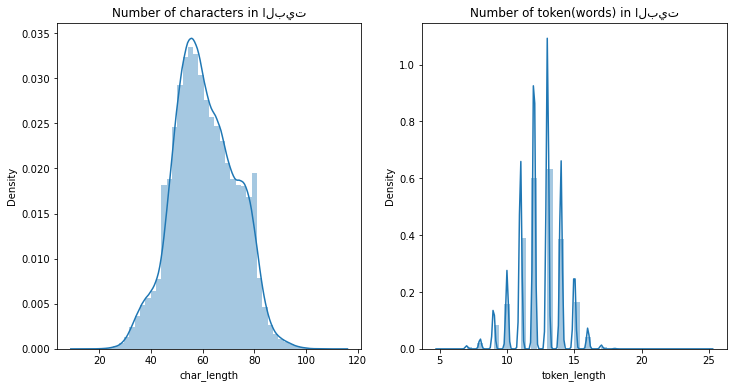

In [20]:
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.distplot(poem_data['char_length'], ax=ax1)
sns.distplot(poem_data['token_length'], ax=ax2)
ax1.set_title('Number of characters in البيت')
ax2.set_title('Number of token(words) in البيت')
plt.show()


## Distribution of character length [اكثر ٥ عصور ]

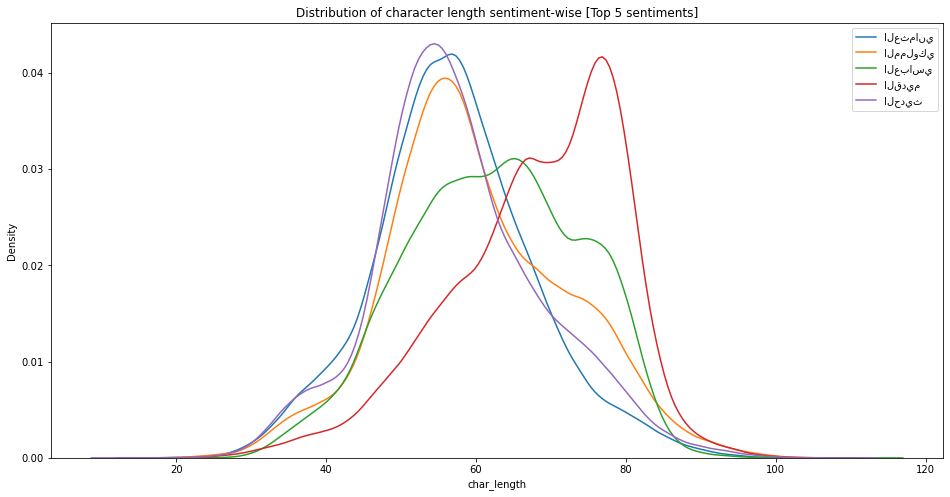

In [21]:
fig, ax = plt.subplots(figsize=(16,8))
for ages_poems in poem_data['target'].value_counts().sort_values()[-5:].index.tolist():
    #print(ages_poems)
    sns.kdeplot(poem_data[poem_data['target']==ages_poems]['char_length'],ax=ax, label=ages_poems)
ax.legend()
ax.set_title("Distribution of character length sentiment-wise [Top 5 sentiments]")
plt.show()


## Distribution of token length [اكثر ٥ عصور ]

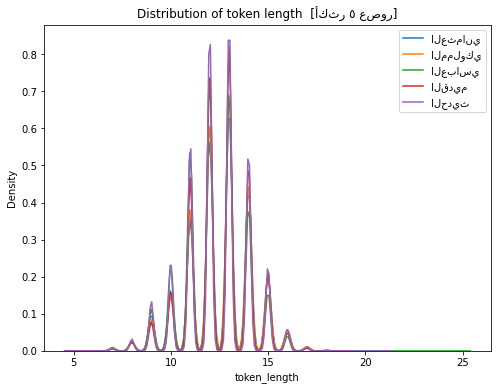

In [22]:
fig, ax = plt.subplots(figsize=(8,6))
for ages_poems in poem_data['target'].value_counts().sort_values()[-5:].index.tolist():
    #print(ages_poems)
    sns.kdeplot(poem_data[poem_data['target']==ages_poems]['token_length'],ax=ax, label=ages_poems)
ax.legend()
ax.set_title("Distribution of token length  [أكثر ٥ عصور]")
plt.show()

## Most common character and token length

<ipython-input-23-f273cb409c1c>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(avg_df.index, rotation = 45)
<ipython-input-23-f273cb409c1c>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(avg_df.index, rotation = 45)


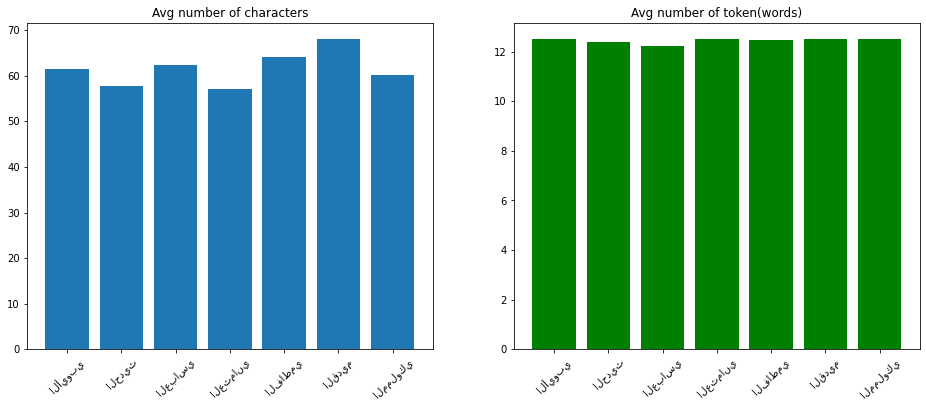

In [23]:
avg_df = poem_data.groupby('target').agg({'char_length':'mean', 'token_length':'mean'})

fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
ax1.bar(avg_df.index, avg_df['char_length'])
ax2.bar(avg_df.index, avg_df['token_length'], color='green')
ax1.set_title('Avg number of characters')
ax2.set_title('Avg number of token(words)')
ax1.set_xticklabels(avg_df.index, rotation = 45)
ax2.set_xticklabels(avg_df.index, rotation = 45)
plt.show()

In [24]:
poem_data['len']=poem_data['البيت'].apply(lambda x : len([ t for t in x.split()]))

/Users/mada/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='len', ylabel='target'>

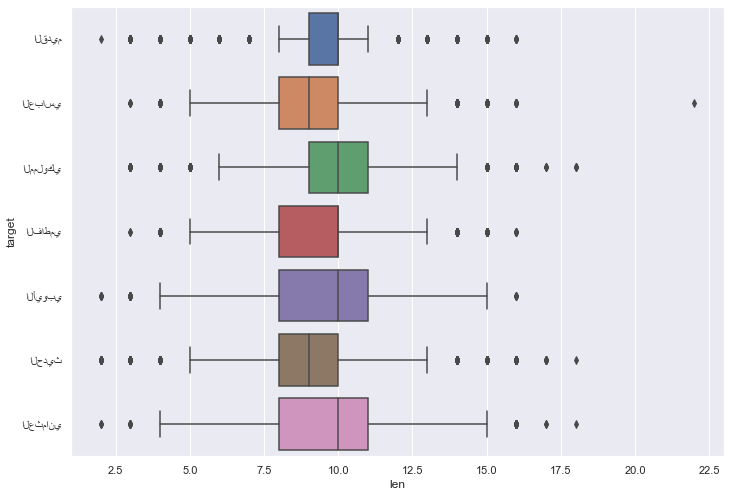

In [25]:
## Relation between العصر and طول البيت
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(poem_data['len'],y=poem_data['target'])

/Users/mada/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of length')

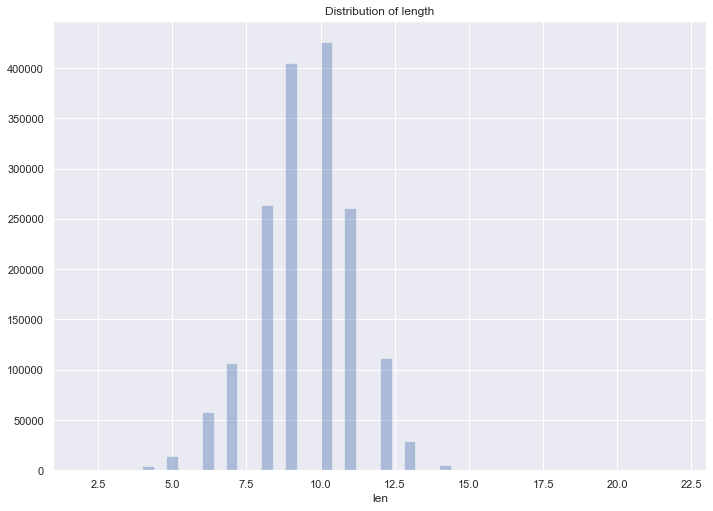

In [26]:
sns.distplot(poem_data['len'],kde=False).set_title('Distribution of length') ## max tweets are about 20 words long

 -------

## split dataset groupby الديوان

In [27]:
poem_data.الديوان.value_counts(normalize=True)

الديوان الرئيسي                  9.819796e-01
عمارة اليمني                     1.481754e-03
الأخطل الصغير                    1.290522e-03
رعد بندر                         1.082067e-03
محمد العيد آل خليفة              5.018366e-04
                                     ...     
أبو جعفر خالد بن كثير الزوزني    5.938895e-07
أبو الحسن ابن نجدة               5.938895e-07
هشام المري                       5.938895e-07
مالك الأصم                       5.938895e-07
النضيري                          5.938895e-07
Name: الديوان, Length: 749, dtype: float64

In [28]:
data= poem_data.groupby(['الديوان'])['البيت'].apply(','.join).reset_index()

In [29]:
#Drop الديوان column
data.drop(['الديوان' ], axis=1, inplace=True)

In [30]:
data.head()

البيت
0  قف بالديار فنادها بسلام:    حييت من دمن ورسم خيام,كانت ربوعك للظباء أوانساً    ما بالها لنوافر الآرام؟,يا دار جيرتنا عهدتك جنة    بنعيمها لو دمت دار مقام,أيامنا اللاتي لبسنا ظلها    بالأبرقين سقيت من أيام,فإذا الهموم تطاولت فاطلب لها    عيشاً مداماً باتِّراع مدام,صهباء تسطع في الكؤوس كأنها    شمس تقلبها بدور تمام,وتكاد تخفي رقة ولطافةً    لو لم يخيلها خيال الجام,وإذا تسرب في العروق ذكاؤها    أضحى تشعب نورها في الهام,من كف ساق لو سقاك بكفه    سماً لكان شفاء كل سقام,وكأنها معصورة من خده    إذ ظلت ترمقه بلحظ سام,ومشى بكتان فخلت عناكباً    نسجت على الياقوت ثوب قتام,أعجب ببدر سالم كتانه    وبه تحرق أنفس الأقوام,قم فاسقني ودع الرشاد لأهله    إن الشباب مطية الآثام,واشرب بذكرى دولة الشيخ الجليل    أخي العلا والجود والإنعام,ضرم الجوانح للمعالي، لم يزل    يسعى لها بصبابة وغرام,قد تيمته المكرمات فما له    في إثرها من مطعم ومنام,يحوي المغانم بالمغارم دهره    والعز بالأسياف والأقلام,قلم إذا ركب البنان تنشرت    حلل البيان وما اهتدى لكلام,أنكرت لمة رأتها خضيباً    ثم قالت: رأيت زوراً غريبا,وتصدت للوصل ثمت صدت:    لا تصدي فما رأيت عجيبا,يا مشيباً جنى عليّ صدوداً    وصدوداً جنى علي مشيبا,ما عجبنا من حادثات الليالي    أن يكون الولدان فيهن شيبا                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [31]:
data.البيت.value_counts(normalize=True)
#normaliaize

بلاني الزمان ولا ذنب لي    بلى، كل بلواه للأنبل,وأعظم ما ساء من صرفه    وفاة أبي بكر الحنبلي,سراج العلوم ولكن خبا    وثوب الجمال ولكن بلي                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

------

## Preprocess the text

### Some basic Function to clean our Poem

- Remove english letters
- Remove harakat, tashkeel and tatweel
- Remove arabic and english punctuations
- Remove extra spaces
- Remove numbers
- Remove anything you see not related!

In [32]:
arabic_punctuations = '''«»`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

In [33]:
def clean(text):

    output = re.sub(r'\s*[A-Za-z]+\b', ' ' , text) #Remove english letters
    output = re.sub("[إأآا]", "ا", output)
    output = re.sub("ؤ", "و", output)
    
    output = re.sub("وو", "و", output)
    output = re.sub("يي", "ي", output)
    output = re.sub("اا", "ا", output)

    output = strip_harakat(output) #Remove harakat   
    output = strip_tashkeel(output) #Remove tashkel
    output = strip_tatweel(output)  
    
    
    
    translator = str.maketrans(' ',' ', punctuations_list) #remove arabic and english punctuations
    output = output.translate(translator)
    output = " ".join(output.split()) #remove extra spaces
    output = re.sub('\w*\d\w*', ' ', output)# Remove numbers
    return output.strip()

In [34]:
data.البيت = data.البيت.map(clean)

In [35]:
data.head(5)

البيت
0  قف بالديار فنادها بسلام حيت من دمن ورسم خيامكانت ربوعك للظباء اوانسا ما بالها لنوافر الاراميا دار جيرتنا عهدتك جنة بنعيمها لو دمت دار مقامايامنا اللاتي لبسنا ظلها بالابرقين سقيت من ايامفاذا الهموم تطاولت فاطلب لها عيشا مداما باتراع مدامصهباء تسطع في الكوس كانها شمس تقلبها بدور تماموتكاد تخفي رقة ولطافة لو لم يخيلها خيال الجامواذا تسرب في العروق ذكاوها اضحى تشعب نورها في الهاممن كف ساق لو سقاك بكفه سما لكان شفاء كل سقاموكانها معصورة من خده اذ ظلت ترمقه بلحظ سامومشى بكتان فخلت عناكبا نسجت على الياقوت ثوب قتاماعجب ببدر سالم كتانه وبه تحرق انفس الاقوامقم فاسقني ودع الرشاد لاهله ان الشباب مطية الاثامواشرب بذكرى دولة الشيخ الجليل اخي العلا والجود والانعامضرم الجوانح للمعالي لم يزل يسعى لها بصبابة وغرامقد تيمته المكرمات فما له في اثرها من مطعم ومناميحوي المغانم بالمغارم دهره والعز بالاسياف والاقلامقلم اذا ركب البنان تنشرت حلل البيان وما اهتدى لكلامانكرت لمة راتها خضيبا ثم قالت رايت زورا غريباوتصدت للوصل ثمت صدت لا تصدي فما رايت عجيبايا مشيبا جنى علي صدودا وصدودا جنى علي مشيباما عجبنا من حادثات الليالي ان يكون الولدان فيهن شيبا                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

### Remove HAMZA, ALEF_MADDA, ALEF_HAMZA_ABOVE

In [36]:
#arabic_pattern = re.compile("["
        #u'\u060C' #COMMA 
        #u'\u061B' #SEMICOLON  
        #u'\u061F' #QUESTION
        #u'\u0621' #HAMZA
        #u'\u0622' #ALEF_MADDA
        #u'\u0623' #ALEF_HAMZA_ABOVE
#                           "]+", flags=re.UNICODE)

In [37]:
#data['البيت'] = data['البيت'].apply(lambda x: arabic_pattern.sub(r'',x))
#data.head()

-----

In [38]:
data_list=data.البيت.tolist()

In [39]:
#data_list

# Tokenization & stemming

### Tokenization

In [41]:
# Function which directly tokenize the Poem data 
from camel_tools.tokenizers.word import simple_word_tokenize

tokene = data.البيت.apply(simple_word_tokenize)

In [42]:
tokene.head()

0    [قف, بالديار, فنادها, بسلام, حيت, من, دمن, ورسم, خيامكانت, ربوعك, للظباء, اوانسا, ما, بالها, لنوافر, الاراميا, دار, جيرتنا, عهدتك, جنة, بنعيمها, لو, دمت, دار, مقامايامنا, اللاتي, لبسنا, ظلها, بالابرقين, سقيت, من, ايامفاذا, الهموم, تطاولت, فاطلب, لها, عيشا, مداما, باتراع, مدامصهباء, تسطع, في, الكوس, كانها, شمس, تقلبها, بدور, تماموتكاد, تخفي, رقة, ولطافة, لو, لم, يخيلها, خيال, الجامواذا, تسرب, في, العروق, ذكاوها, اضحى, تشعب, نورها, في, الهاممن, كف, ساق, لو, سقاك, بكفه, سما, لكان, شفاء, كل, سقاموكانها, معصورة, من, خده, اذ, ظلت, ترمقه, بلحظ, سامومشى, بكتان, فخلت, عناكبا, نسجت, على, الياقوت, ثوب, قتاماعجب, ببدر, سالم, كتانه, وبه, تحرق, انفس, الاقوامقم, فاسقني, ودع, ...]
1    [تذكر, عهد, ماضيه, فحن, فواد, فيك, مفتون, معنىيحن, لذكريات, غاليات, ولولا, ذكرياتك, ما, تغنىمتى, صفو, الزمان, يعود, يوم, فيخبركم, بصدق, الود, عناوكيف, اساءت, الايام, فين, وكيف, تشفت, الحساد, مناوكيف, تركت, خلك, في, عناء, وباشرت, السعادة, مطمئناالم, تشعر, بمن, وفى, وضحى, الم, يخطر, ببالك, كيف, كناامثلك, من, تنسيه, ا

In [44]:
"""from nltk.tokenize import TweetTokenizer
from nltk.tokenize import  word_tokenize
tt = TweetTokenizer()
data['البيت'].apply(tt.tokenize)"""

"from nltk.tokenize import TweetTokenizer\nfrom nltk.tokenize import  word_tokenize\ntt = TweetTokenizer()\ndata['البيت'].apply(tt.tokenize)"

In [45]:
"""from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
ps = PorterStemmer()


"""


'from nltk.stem import PorterStemmer\nfrom nltk.tokenize import sent_tokenize, word_tokenize\nps = PorterStemmer()\n\n\n'

In [46]:
"""def tokenize(text):
    return word_tokenize(text)

def stemming(words):
    stem_words = []
    for w in words:
        w = ps.stem(w)
        stem_words.append(w)
    return stem_words"""

'def tokenize(text):\n    return word_tokenize(text)\n\ndef stemming(words):\n    stem_words = []\n    for w in words:\n        w = ps.stem(w)\n        stem_words.append(w)\n    return stem_words'

### Stemming

So what is stemming for? Its a normilization method for basically to normalize words and shorten the lookup because many vartions of words carry the same meaning other then when tense is involed.

In [43]:
from nltk import word_tokenize
from nltk.stem.isri import ISRIStemmer

st = ISRIStemmer()
word_list = str(data.البيت)
wordsfilter=[]
# Define a function
def filterr(word_list):
    
    for a in word_tokenize(word_list):
        stem = st.stem(a)
        wordsfilter.append(stem)
    return wordsfilter

In [44]:
# Call the function
filterr(word_list)

['0',
 'قف',
 'دير',
 'فند',
 'سلم',
 'حيت',
 'من',
 'دمن',
 'رسم',
 'خيامكانت',
 'ربع',
 'ظبء',
 'ونس',
 'ما',
 'بال',
 'نفر',
 'ارم',
 'دار',
 'جير',
 'عهد',
 'جنة',
 'نعم',
 'لو',
 'دمت',
 'دار',
 'مقامايام',
 'لتي',
 'لبس',
 'ظله',
 'برق',
 'سقت',
 'من',
 'ايامفاذا',
 'همم',
 'طول',
 'طلب',
 'لها',
 'عيش',
 'مدا',
 'ترع',
 'مدامصهباء',
 'سطع',
 'في',
 'كوس',
 'كان',
 'شمس',
 'قلب',
 'بدر',
 'تماموتكاد',
 'تخف',
 'رقة',
 'لطف',
 'لو',
 'لم',
 'يخل',
 'خيل',
 'جامواذ',
 'سرب',
 'في',
 'عرق',
 'ذكو',
 'اضحى',
 'شعب',
 'نور',
 'في',
 'همم',
 'كف',
 'ساق',
 'لو',
 'سقك',
 'بكف',
 'سما',
 'لكن',
 'شفء',
 'كل',
 'سقاموكان',
 'عصر',
 'من',
 'خده',
 'اذ',
 'ظلت',
 'رمق',
 'لحظ',
 'ومشى',
 'بكت',
 'فخل',
 'عنكب',
 'نسج',
 'على',
 'يقت',
 'ثوب',
 'قتاماعجب',
 'بدر',
 'سلم',
 'كتن',
 'وبه',
 'حرق',
 'نفس',
 'قوامقم',
 'فسق',
 'ودع',
 'رشد',
 'لهل',
 'ان',
 'شبب',
 'طية',
 'اثامواشرب',
 'ذكرى',
 'دول',
 'شيخ',
 'جلل',
 'اخي',
 'علا',
 'جود',
 'انعامضرم',
 'جنح',
 'علي',
 'لم',
 'يزل',
 'سعى',
 

In [49]:
#data['Stemming'] = data['البيت'].apply(filterr)

## Stop words removal

In [45]:
stpwrd = nltk.corpus.stopwords.words('arabic')
custom_stopwords= ['ان', 'اذا', 'الى', 'الا', 'او', 'وقد', 'وان', 'اذ',  'ولم', 'كنت', 'ال' , 'فما', 'وفي', 'منك',
                   'ابن','قلت', 'عني','كانما','عندي','فى','فانني','ءال','ءت','ءك','ئح','ئع','ئف','ئله','ائب','ائتلافا','ائتلاق','يى','يي','يياس','ييد','منهم','فعل','وكل'
                   ,'وليس','ولما','ابي', 'ابو', 'كابي', 'ولما','يكن','عني', 'عنك','يد','رايت','وكم' ,'عنك', 'ريب','تراه','ترى','واما','بكل', 'قلت', 'امسى', 'وذا', 'زال', 'امسى', 'طال'
                   ,'وبين', 'ادري', 'انت', 'ام', 'عنه', 'علي', 'اليه', 'مني', 'فقد', 'انا', 'اني', 'فيك'  ,  'يقال' ,' فانها', 'برحت' ,'اخو',' يجد' ,'ولكنه', 'وقال', 'يبدو',' ففي','فسقى', 'ينفذ', 'جان', 'حشاك', 'تحكم', 'انك', 'وثوب', 'بلواه','والترب',' يتلوه', 'شفت', 'غيركم', 'فارحم','ءا','ءاباوه','ءابصرت','ءات','ءاثارنا','ءاثرواحديث','ءاخر','ءادابه','ءادم','ءادمومنك','ييممها','ييمموا','ييمنه','ييمها','ييمهواين','ييميوم','يين','ييه','ييها','ييود' , 'مثلها', 'معا' ,'وانما' ,'للهوى' ,'يبت' ,'انك', 'تبيت', 'تعلمت' ,'تبيت', 'كتمت' ,'هملا','ءان','ءانسة','ءاي','ءايات','ءاية','ءايه','ءتنا','ءل','ءه','ءوا' ,'اليكم','مصر','لبنان','بغداد','العراق','الجزائر' ,'لديه' ,'ايضا', 'يقال','كانت', 'وهي',
                   'اي','عليها', 'اذ', 'فما', 'اين','بن','ابا', 'بني','اليك','ال', 'بلا','ايها','اين', 'شيء', 'عن' 
                   'شئت', 'يك','وهل', 'فليس', 'بعدما','ئد' ,'فهي','ئل''يبت', 'يمس', 'امن', 'منا','بكر', 'بلي', 'لابن', 'عليهم', 'الان','فوقها','بغير','بيننا','منا','لابن', 'عليهم','اانت','ابائه','ابائي','ءة''ببب', 'لها', 'منها', 'ئل' ,'من', 'هو' , 'به', 'كن', 'كلا', 'الل', 'وعء'  , 'الذي' , 'متى', 'هذا','به','عناوكيف', 'سءت', 'ايم','ائمة','اانتم','اب','ابان','اباء', 'لكل' ,'افي','والا','فلما','عليكم','نال','ولكم','ولي','تكن','ئب','ئر','ئق','ئك','ئم','ئن','ئي','اء','ائتلاف','اباءه','ءة','اباح','و انما' ,'بان','شئت','ابدا','كانها','المرء','ءاذانهامست','ءاسه','ءاطام','ءافاقها','ءافن','ءالا','ءالاء','ءالاخوصا','ءالب','ءالله','ييقظ','ييك','ييكين','ييم','ييمم','ييممجلت','ييممفرد','ييمملقد','ييممله','ييممه','فالان' ,'اهل','كفى','مضى','اهل','جاء','صرف','الله','ارى','صرفه', 'خبا','اترى','اليها','واني','اما','قل','فكم','والا','انني', 'لقد', 'انه', 'كانه', 'فلم',  'وانت', 'ظل', 'لمن', 'فهو', 'قال', 'عنها', 'علينا', 'فاذا', 'فكيف'
]
stpwrd.extend(custom_stopwords)


## CountVectorizer 

In [46]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/mada/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
CountVector = CountVectorizer(max_features=8000, stop_words= stpwrd)
vector1 = CountVector.fit_transform(data['البيت'])

poem_vect=pd.DataFrame(vector1.toarray(), columns=CountVector.get_feature_names())

/Users/mada/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['آمين', 'أب', 'أخ', 'أفعل', 'أفعله', 'ؤلاء', 'إل', 'إم', 'ات', 'اتان', 'ارتد', 'انفك', 'انما', 'برح', 'تان', 'تبد', 'تحو', 'تعل', 'حد', 'حم', 'حي', 'خب', 'ذار', 'سيما', 'صه', 'ظن', 'عد', 'فانها', 'ففي', 'قط', 'مر', 'مكان', 'مكانكن', 'نب', 'هات', 'هب', 'واها', 'وراء', 'يتلوه', 'يجد'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [48]:
poem_vect

,اباك,ابالي,اباه,ابت,ابتداء,ابتسام,ابتسمت,ابتغي,ابحر,ابد,...,يود,يودي,يوسف,يولي,يوم,يوما,يومك,يومل,يومه,يومي
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
747,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
poem_vect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Columns: 8000 entries, اباك to يومي
dtypes: int64(8000)
memory usage: 45.7 MB


## TF-IDF Vectorizer

In [50]:
tfidf = TfidfVectorizer(max_features=8000,stop_words=stpwrd)
v1 = tfidf.fit_transform(data_list)
poem_df = pd.DataFrame(v1.toarray(),columns=tfidf.get_feature_names())
poem_df

/Users/mada/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['آمين', 'أب', 'أخ', 'أفعل', 'أفعله', 'ؤلاء', 'إل', 'إم', 'ات', 'اتان', 'ارتد', 'انفك', 'انما', 'برح', 'تان', 'تبد', 'تحو', 'تعل', 'حد', 'حم', 'حي', 'خب', 'ذار', 'سيما', 'صه', 'ظن', 'عد', 'فانها', 'ففي', 'قط', 'مر', 'مكان', 'مكانكن', 'نب', 'هات', 'هب', 'واها', 'وراء', 'يتلوه', 'يجد'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


,اباك,ابالي,اباه,ابت,ابتداء,ابتسام,ابتسمت,ابتغي,ابحر,ابد,...,يود,يودي,يوسف,يولي,يوم,يوما,يومك,يومل,يومه,يومي
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.025295,0.0,0.0,0.0,0.0,0.00000
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000
745,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.070750,0.0,0.0,0.0,0.0,0.00000
746,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.095528,0.0,0.0,0.0,0.0,0.19367
747,0.142149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000


----- 

# Data visualization

## The Most Common words

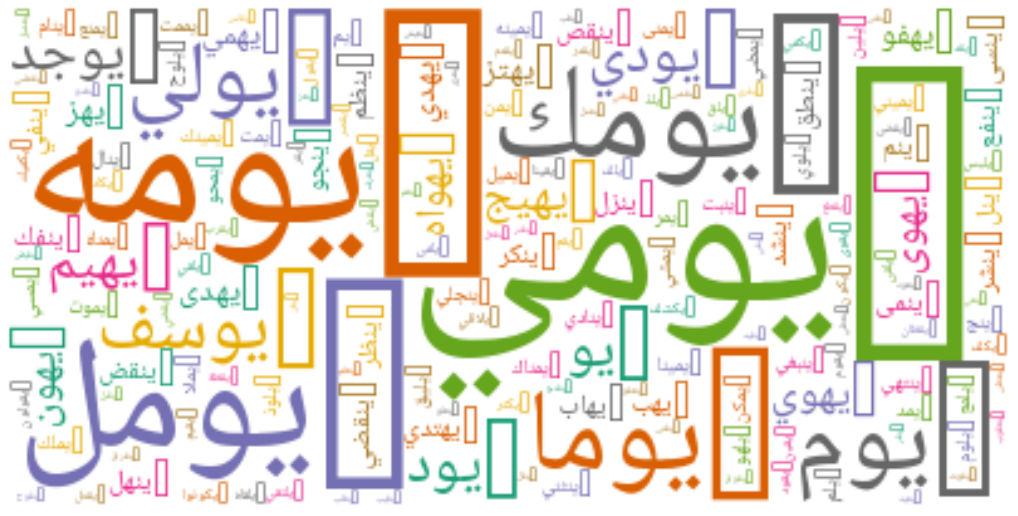

In [51]:
import matplotlib as mpl
awc = ArabicWordCloud(background_color="white",)

mpl.rcParams['figure.figsize']=(18,12.0)  
mpl.rcParams['font.size']=12            
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 

# wordcloud = awc.generate(str(tfidf.get_feature_names())).from_text(
#     str(tfidf.get_feature_names()))

wordcloud = awc.generate(str(CountVector.get_feature_names())).from_text(str(CountVector.get_feature_names()))
#wordcloud = WordCloud(background_color='white', max_words=5000, contour_width=3, contour_color='steelblue', width=800, height=400)

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud.recolor(colormap='Dark2'),interpolation='bilinear')
#plt.title("Word Cloud of all the words")
plt.axis('off')
plt.savefig("arabicpoem.png",transparent=True,  bbox_inches="tight")

plt.show();

In [58]:
"""#Function to Create Wordcloud
import matplotlib as mpl
mpl.rcParams['figure.figsize']=(18,12.0)  
mpl.rcParams['font.size']=12            
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 
def create_wordcloud(text):
    #mask = np.array(Image.open("cloud.png"))
    
    stopwords = set(stpwrd)
    wc = ArabicWordCloud(background_color="white",
                  
                  max_words=3000,
                  stopwords=stpwrd,
                  repeat=True)
    wc.generate(str(text)).from_text(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))"""

In [ ]:
"""#Creating wordcloud for all tweets
create_wordcloud(data["البيت"][:1000].values)"""

 -----

In [52]:
#Calculating tweet's lenght and word count
data['text_len'] = data['البيت'].astype(str).apply(len)
data['text_word_count'] = data['البيت'].apply(lambda x: len(str(x).split()))

In [55]:
data.sample(3)

,البيت,text_len,text_word_count
725,رب دار بالغضا طال بلاها عكف الركب عليها فبكاهادرست الا بقايا اسطر سمح الدهر بها ثم محاهاكان لي فيها زمان وانقضى فسقى الله زماني وسقاهاوقفت فيها الغوادي وقفة الصقت حر ثراها بحشاهاوبكت اطلالها نائبة عن جفوني احسن الله جزاهاقل لجيران مواثيقهم كلما احكمتها رثت قواهاكنت مشغوفا بكم اذ كنتم شجرا لا يبلغ الطير ذراهالا تبيت الليل الا حولها حرس ترشح بالموت ظباهاواذا مدت الى اغصانها كف جان قطعت دون جناهافتراخى الامر حتى اصبحت هملا يطمع فيها من راهاتخصب الارض فلا اقربها رائدا الا اذا عز حماهالا يراني الله ارعى روضة سهلة الاكناف من شاء رعاهاواذا ما طمع اغرى بكم عرض الياس لنفسي فثناهافصبابات الهوى اولها طمع النفس وهذا منتهاهالا تظنوا لي اليكم رجعة كشف التجريب عن عيني عماهاان زين الدين اولاني يدا لم تدع لي رغبة فيما سواهاقالوا التحى السهم قلت حصن حشاك فالان لا يطيشفالسهم لا ينفذ الرمايا الا اذا كان فيه ريش,802,144
285,خالل اذا خاللت خلا خيرا وبه تمسك تقتبس من خيرهواهجر اناسا مهجرين اولي الخنا فالهجر سامعه درية ضيرهواذا رايتهم فاعرض عنهم حتى يخوضوا في حديث غيرهسماع العلم من غير الطبيعة سراب غر راجيه بقيعهوهل تجدي السيوف على بنيها اذا ما خانها الايدي المطيعه,242,43
357,لولا حذاري من ان الام على عتاب يوم منه واعتابهلسرت والليل هودجي وذباب ال سيف في نحره الى بابه,93,19


 -----

In [56]:
# Most Used Words
count = pd.DataFrame(poem_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
الهوى,12.628527
الناس,11.628974
قلبي,10.806979
يوم,10.626117
الزمان,10.226842
الدنيا,9.293326
الارض,7.806018
الورى,7.476788
القلب,7.291517
العلا,6.846608


 -----

# ngram

In [57]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = stpwrd).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [58]:
n2_bigrams = get_top_n_gram(data['البيت'],(2,2),20)

n2_bigrams

/Users/mada/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['آمين', 'أب', 'أخ', 'أفعل', 'أفعله', 'ؤلاء', 'إل', 'إم', 'ات', 'اتان', 'ارتد', 'انفك', 'انما', 'برح', 'تان', 'تبد', 'تحو', 'تعل', 'حد', 'حم', 'حي', 'خب', 'ذار', 'سيما', 'صه', 'ظن', 'عد', 'فانها', 'ففي', 'قط', 'مر', 'مكان', 'مكانكن', 'نب', 'هات', 'هب', 'واها', 'وراء', 'يتلوه', 'يجد'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


[('امير المومنين', 856),
 ('شمس الضحى', 677),
 ('يوم الوغى', 548),
 ('مدى الدهر', 493),
 ('ريح الصبا', 462),
 ('صروف الدهر', 450),
 ('خير الورى', 412),
 ('الناس كلهم', 381),
 ('ملوك الارض', 366),
 ('طول المدى', 347),
 ('الدين والدنيا', 345),
 ('اله العرش', 322),
 ('شمس النهار', 321),
 ('يوم النوى', 277),
 ('عبد العزيز', 275),
 ('بدر الدجى', 271),
 ('رب العرش', 263),
 ('النبي محمد', 261),
 ('مدى الايام', 253),
 ('طورا وطورا', 252)]

In [59]:
#n3_trigram
n3_trigrams = get_top_n_gram(data['البيت'],(3,3),20)

n3_trigrams

[('الحمد للهالحمد لله', 113),
 ('اسمائك عجل المددالله', 88),
 ('شرق البلاد وغربها', 50),
 ('شعري ابيتن ليلة', 34),
 ('طلعت شمس النهار', 31),
 ('الصلاة النبي واله', 31),
 ('الهدى بحر الندى', 30),
 ('اهلا وسهلا ومرحبا', 28),
 ('ذر قرن الشمس', 27),
 ('خاتم الرسل الكرام', 26),
 ('تغلب ابنة وائل', 24),
 ('طويل نجاد السيف', 24),
 ('زلت محروس الجناب', 24),
 ('وخير القول اصدقه', 23),
 ('يوم اغر محجل', 23),
 ('المصطفى وابن عمه', 23),
 ('حاش لله اكون', 23),
 ('راكبا عرضت فبلغن', 22),
 ('شطت غربة النوى', 22),
 ('خير ركب المطايا', 22)]

 -----

# Topic Modeling

### Latent Dirichlet Allocation (LDA) - CountVectorizer

In [60]:
corpus = matutils.Sparse2Corpus(vector1)
id2word = dict((v, k) for k, v in CountVector.vocabulary_.items())
lda = models.LdaModel(corpus=corpus, num_topics=5, id2word=id2word, passes=5)
lda.print_topics()

[(0,
  '0.982*"اغار" + 0.002*"الاهواء" + 0.001*"اظهر" + 0.001*"الاشعار" + 0.000*"اسماعيل" + 0.000*"البديع" + 0.000*"اسف" + 0.000*"ادراك" + 0.000*"الاصيل" + 0.000*"الامانة"'),
 (1,
  '0.000*"اس" + 0.000*"اخي" + 0.000*"اغار" + 0.000*"الاثار" + 0.000*"اضحت" + 0.000*"اقوام" + 0.000*"الاحسان" + 0.000*"الاحساب" + 0.000*"احاديث" + 0.000*"الاشياء"'),
 (2,
  '0.000*"اس" + 0.000*"اخي" + 0.000*"اغار" + 0.000*"الاثار" + 0.000*"اضحت" + 0.000*"اقوام" + 0.000*"الاحسان" + 0.000*"الاحساب" + 0.000*"احاديث" + 0.000*"الاشياء"'),
 (3,
  '0.000*"اس" + 0.000*"اخي" + 0.000*"اغار" + 0.000*"الاثار" + 0.000*"اضحت" + 0.000*"اقوام" + 0.000*"الاحسان" + 0.000*"الاحساب" + 0.000*"احاديث" + 0.000*"الاشياء"'),
 (4,
  '0.000*"اس" + 0.000*"اغار" + 0.000*"اخي" + 0.000*"الاثار" + 0.000*"اضحت" + 0.000*"اقوام" + 0.000*"الاحسان" + 0.000*"الاحساب" + 0.000*"احاديث" + 0.000*"الاشياء"')]

In [61]:
for topic in lda.show_topics(num_topics=5, formatted=False, num_words=6):
    print("Topic {}: ".format(topic[0]))
    topicwords = [w for (w, val) in topic[1]]
    print(topicwords)

Topic 0: 
['اغار', 'الاهواء', 'اظهر', 'الاشعار', 'اسماعيل', 'البديع']
Topic 1: 
['اس', 'اخي', 'اغار', 'الاثار', 'اضحت', 'اقوام']
Topic 2: 
['اس', 'اخي', 'اغار', 'الاثار', 'اضحت', 'اقوام']
Topic 3: 
['اس', 'اخي', 'اغار', 'الاثار', 'اضحت', 'اقوام']
Topic 4: 
['اس', 'اغار', 'اخي', 'الاثار', 'اضحت', 'اقوام']


### Latent Dirichlet Allocation (LDA) - TF-IDF

In [62]:
corpus = matutils.Sparse2Corpus(v1)

In [63]:
id2word = dict((v, k) for k, v in tfidf.vocabulary_.items())

In [64]:
len(id2word)

8000

In [65]:
lda = models.LdaModel(corpus=corpus, num_topics=5, id2word=id2word, passes=5)

In [66]:
lda.print_topics()

[(0,
  '0.003*"احسان" + 0.002*"اخلاق" + 0.002*"الانفس" + 0.002*"احدا" + 0.002*"البكا" + 0.002*"البدر" + 0.002*"اصبحوا" + 0.002*"افئدة" + 0.002*"اقول" + 0.002*"البعيد"'),
 (1,
  '0.003*"البكر" + 0.003*"افق" + 0.003*"اقسم" + 0.003*"استطيع" + 0.003*"الاحرار" + 0.003*"احكامه" + 0.003*"اراني" + 0.002*"الانوف" + 0.002*"الاذى" + 0.002*"الاقران"'),
 (2,
  '0.003*"اقبل" + 0.003*"البيد" + 0.003*"ازهار" + 0.003*"البعض" + 0.003*"اجل" + 0.003*"الاوصاف" + 0.003*"اعاديه" + 0.002*"اقبال" + 0.002*"الاسماع" + 0.002*"الانبياء"'),
 (3,
  '0.003*"اعطافها" + 0.003*"اتيح" + 0.003*"البقاع" + 0.003*"ازداد" + 0.003*"ادعى" + 0.003*"اعطاك" + 0.003*"اذل" + 0.003*"اجد" + 0.003*"ازهر" + 0.002*"اقلامه"'),
 (4,
  '0.010*"اغار" + 0.007*"الاهواء" + 0.006*"اظهر" + 0.005*"اسماعيل" + 0.005*"البديع" + 0.005*"الاشعار" + 0.005*"ادراك" + 0.004*"اسف" + 0.004*"الاصيل" + 0.004*"الاهلة"')]

In [67]:
for topic in lda.show_topics(num_topics=5, formatted=False, num_words=6):
    print("Topic {}: ".format(topic[0]))
    topicwords = [w for (w, val) in topic[1]]
    print(topicwords)

Topic 0: 
['احسان', 'اخلاق', 'الانفس', 'احدا', 'البكا', 'البدر']
Topic 1: 
['البكر', 'افق', 'اقسم', 'استطيع', 'الاحرار', 'احكامه']
Topic 2: 
['اقبل', 'البيد', 'ازهار', 'البعض', 'اجل', 'الاوصاف']
Topic 3: 
['اعطافها', 'اتيح', 'البقاع', 'ازداد', 'ادعى', 'اعطاك']
Topic 4: 
['اغار', 'الاهواء', 'اظهر', 'اسماعيل', 'البديع', 'الاشعار']


> Since the **LDA** model did not perform well, let's see **LSA, CorEx and NMF** models.

### Latent Semantic Analysis (LSA) - CountVectorizer

In [85]:
lsa = TruncatedSVD(5)
doc_topic = lsa.fit_transform(vector1)
lsa.explained_variance_ratio_

array([9.99985068e-01, 2.26519393e-06, 1.80693745e-06, 1.44981437e-06,
       4.05987617e-07])

In [86]:
lsa = TruncatedSVD(5)
doc_topic

array([[ 0.92479609, -0.0609819 ,  0.0438295 , -0.03208919, -0.05087447],
       [ 7.61738667,  2.13542436,  1.07336333,  0.31309366,  1.80396516],
       [ 0.53522709,  0.95826492,  0.27210788, -0.42080804, -0.19579023],
       ...,
       [ 0.77618507,  0.04604533, -0.2410926 , -0.20066988, -0.21230019],
       [ 1.52649948, -0.42692097, -0.22923975, -0.04079428,  0.70101196],
       [ 2.0425913 , -0.45286641, -0.74978726, -0.22888463,  0.12052779]])

In [87]:
doc_topic = lsa.fit_transform(vector1)
lsa.explained_variance_ratio_

array([9.99985068e-01, 2.26519393e-06, 1.80693744e-06, 1.44981437e-06,
       4.05987728e-07])

In [88]:
topic_word = pd.DataFrame(lsa.components_.round(3), # 10 for dec pts
             index = ["component_1","component_2","component_3","component_4","component_5"],
             columns = CountVector.get_feature_names()) # notes is vectoriser only 
topic_word

,اباك,ابالي,اباه,ابت,ابتداء,ابتسام,ابتسمت,ابتغي,ابحر,ابد,...,يود,يودي,يوسف,يولي,يوم,يوما,يومك,يومل,يومه,يومي
component_1,0.003,0.006,0.004,0.008,0.002,0.002,0.002,0.004,0.002,0.003,...,0.003,0.002,0.013,0.002,0.221,0.109,0.003,0.002,0.005,0.005
component_2,-0.005,0.001,-0.000,-0.009,-0.000,0.000,-0.004,-0.000,-0.005,0.001,...,0.001,-0.004,-0.018,-0.005,-0.027,0.035,0.005,-0.000,0.005,0.014
component_3,0.001,-0.009,-0.006,-0.000,-0.003,-0.003,0.013,-0.006,0.002,-0.004,...,-0.004,0.002,0.003,0.002,-0.046,-0.101,-0.000,-0.004,-0.003,0.017
component_4,-0.001,-0.000,-0.000,-0.001,-0.000,0.000,-0.005,-0.000,-0.001,-0.000,...,-0.000,-0.000,-0.002,-0.001,-0.061,-0.001,-0.003,-0.000,-0.004,0.006
component_5,-0.000,0.001,-0.003,-0.010,-0.001,-0.002,-0.002,-0.002,-0.000,-0.002,...,-0.004,-0.001,0.010,0.000,-0.050,-0.036,-0.002,-0.000,-0.002,-0.000


In [89]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        

In [90]:
display_topics(lsa, CountVector.get_feature_names(), 10)


Topic  0
يوم, الدهر, الناس, الهوى, خير, الزمان, قلبي, الدنيا, الورى, الارض

Topic  1
الهوى, الحب, الشعر, الارض, الليل, الكاس, الفتى, الكون, الشرق, الحسن

Topic  2
الايام, الليالي, الزمان, العلى, الشعر, الارض, الهوى, القوافي, الملك, الهدى

Topic  3
الارض, دمي, الاسى, المدى, الحزن, الدماء, الاولى, دم, الدمع, الموت

Topic  4
الحق, الناس, الاسلام, الاله, الحياة, خير, اليوم, العباد, محمد, الحر


### Latent Semantic Analysis (LSA) - TF-IDF

In [91]:
lsa = TruncatedSVD(5)
doc_topic = lsa.fit_transform(v1)
lsa.explained_variance_ratio_

array([0.0086464 , 0.00425801, 0.00369333, 0.00356731, 0.00346546])

In [92]:
lsa = TruncatedSVD(5)
doc_topic

array([[ 0.11150134,  0.00746063,  0.00346057, -0.00181152, -0.05490961],
       [ 0.28860617,  0.00333534, -0.09758952,  0.01938052,  0.05364316],
       [ 0.08530413, -0.12442618, -0.01413644,  0.0620716 ,  0.06552955],
       ...,
       [ 0.1089194 , -0.0330087 ,  0.05590644, -0.00255455, -0.04536366],
       [ 0.12852408,  0.07319909, -0.00917352, -0.10655035, -0.00062676],
       [ 0.14121289,  0.05225723,  0.01248666,  0.01526239, -0.03252729]])

In [93]:
# Transform the doc-term matrix to doc-topic matrix
doc_topic = lsa.fit_transform(v1)
lsa.explained_variance_ratio_

array([0.0086464 , 0.00424181, 0.00372759, 0.00361702, 0.00341077])

In [94]:
# Getting the U-matrix in Decomposition
topic_word = pd.DataFrame(lsa.components_.round(3), # 10 for dec pts
             index = ["component_1","component_2","component_3","component_4","component_5"],
             columns = tfidf.get_feature_names()) # notes is vectoriser only 
topic_word

,اباك,ابالي,اباه,ابت,ابتداء,ابتسام,ابتسمت,ابتغي,ابحر,ابد,...,يود,يودي,يوسف,يولي,يوم,يوما,يومك,يومل,يومه,يومي
component_1,0.005,0.011,0.005,0.013,0.001,0.004,0.005,0.007,0.004,0.003,...,0.004,0.004,0.012,0.003,0.130,0.081,0.005,0.002,0.005,0.007
component_2,-0.002,0.002,-0.003,0.009,0.003,0.005,0.004,-0.011,-0.013,0.001,...,0.005,-0.005,0.014,0.002,0.020,-0.003,-0.007,0.001,-0.007,0.001
component_3,-0.006,-0.013,-0.004,0.008,-0.001,0.003,0.001,-0.005,0.018,0.001,...,0.004,-0.006,0.002,-0.005,-0.023,-0.034,0.003,-0.005,-0.005,0.006
component_4,-0.001,-0.002,-0.009,-0.007,-0.000,0.007,-0.002,-0.009,-0.007,-0.001,...,-0.002,-0.005,0.015,0.000,-0.046,0.046,-0.003,0.004,0.001,-0.008
component_5,-0.004,-0.004,0.008,0.000,-0.000,-0.000,0.004,-0.002,-0.005,-0.002,...,0.001,0.003,0.006,-0.006,-0.046,-0.045,-0.005,-0.000,0.001,-0.006


 - Top 15 key words for each of the 12 topics

In [95]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:

            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        

In [96]:
display_topics(lsa, tfidf.get_feature_names(), 10)


Topic  0
الهوى, الدهر, الناس, يوم, قلبي, الزمان, الدنيا, الارض, الحب, الليل

Topic  1
الهوى, قلبي, الحب, القلب, الدجى, الصبا, حب, العين, العذار, الوجد

Topic  2
الدهر, الزمان, الفضل, اكل, العلوم, الشمس, الجمال, ذنب, الراي, ماء

Topic  3
الزمان, العلوم, ذنب, الجمال, الموت, الدنيا, الحب, الحياة, العمر, نفسك

Topic  4
العلوم, ذنب, الجمال, الزمان, الورى, الدجى, العلا, البلاد, الليل, مسلم


In [73]:
Vt = pd.DataFrame(doc_topic.round(4),
             index = data['البيت'],
             columns = ["component_1","component_2","component_3","component_4","component_5"])
Vt

component_1  \
البيت                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

- Looking at cosine similarity

In [97]:
cosine_similarity((doc_topic[0], doc_topic[12])).round()

array([[1., 0.],
       [0., 1.]])

> Since the **LSA** model did not perform well, we can see that some topics are mixed with each other, let's see **CorEx and NMF** models.

## CorEx Topic Modeling

In [98]:
vectorizer = CountVectorizer(max_features= 8000,
                             stop_words=stpwrd, 
                             binary=True)

doc_word = vectorizer.fit_transform(data['البيت'])
words = list(np.asarray(vectorizer.get_feature_names()))

/Users/mada/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['آمين', 'أب', 'أخ', 'أفعل', 'أفعله', 'ؤلاء', 'إل', 'إم', 'ات', 'اتان', 'ارتد', 'انفك', 'انما', 'برح', 'تان', 'تبد', 'تحو', 'تعل', 'حد', 'حم', 'حي', 'خب', 'ذار', 'سيما', 'صه', 'ظن', 'عد', 'فانها', 'ففي', 'قط', 'مر', 'مكان', 'مكانكن', 'نب', 'هات', 'هب', 'واها', 'وراء', 'يتلوه', 'يجد'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [99]:
topic_model = ct.Corex(n_hidden=5, words=words, seed=1)
topic_model.fit(doc_word, words=words, docs=wordsfilter)

In [100]:
topics = topic_model.get_topics()
topics

[[('قلب', 0.1164764302692466, 1.0),
  ('الماء', 0.11258855417085266, 1.0),
  ('الناس', 0.10983502407802516, 1.0),
  ('يوما', 0.10254842039827906, 1.0),
  ('الليالي', 0.10053008482793512, 1.0),
  ('هوى', 0.09936492052047634, 1.0),
  ('الشمس', 0.0991389570735829, 1.0),
  ('البحر', 0.09380916559493503, 1.0),
  ('الشعر', 0.08951471858822481, 1.0),
  ('جرى', 0.08299752729958094, 1.0)],
 [('الارض', 0.12701064682520863, 1.0),
  ('الدنيا', 0.12466534768828609, 1.0),
  ('الدهر', 0.12075908049244995, 1.0),
  ('خير', 0.10079310980935892, 1.0),
  ('قلبي', 0.10058657510914489, 1.0),
  ('انها', 0.09093979822244383, 1.0),
  ('الورى', 0.09085228066902719, 1.0),
  ('مدى', 0.08095909069819143, 1.0),
  ('الم', 0.08095909069819143, 1.0),
  ('ارض', 0.08017449287091395, 1.0)],
 [('يوم', 0.13686841816299794, 1.0),
  ('الليل', 0.11734458112599407, 1.0),
  ('نار', 0.10795237851728563, 1.0),
  ('الهوى', 0.10285225724266402, 1.0),
  ('القلب', 0.1024302802338782, 1.0),
  ('حسن', 0.09827483754593626, 1.0),
  ('الم

> The **CorEx** model did not produce sensible topics, let's see how **NMF** model performs.

## NMF - CountVectorizer

In [126]:
nmf_model = NMF(5)
doc_topic1 = nmf_model.fit_transform(vector1)
nmf_features = nmf_model.transform(vector1)

/Users/mada/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/Users/mada/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [132]:
nmf_topic= display_topics(nmf_model, CountVector.get_feature_names(), 10)


Topic  0
الناس, الدنيا, الموت, خير, الملك, العلم, الارض, يوم, الدين, القوم

Topic  1
الهوى, قلبي, الحب, القلب, حب, قلب, الفواد, النفس, الحياة, فوادي

Topic  2
الصبا, الدجى, البدر, يوم, الورى, ماء, بدر, الليل, الشمس, ليل

Topic  3
الزمان, العلوم, ذنب, الجمال, قوم, كثيرة, شمل, العشاق, عرضت, نفسك

Topic  4
الدهر, الفضل, اكل, الراي, وقع, الشمس, الشيب, مرض, تعود, اشد


In [135]:
"""topics_by_البيت = pd.DataFrame(nmf_topic, columns = ['الأيام', 'الغزل','الفخر','الرثاء','الاسلامي'])
topics_by_البيت['main_topic'] = topics_by_البيت.idxmax(axis=1)
topics_by_البيت['cleaned_tweet'] = data['البيت']
topics_by_البيت['البيت'] = data['البيت']"""

In [ ]:
"""data["Topic_AR"] = prediction
data.Topic_AR.replace({0: "الأيام", 1:"الغزل", 2:"الفخر", 3:"الرثاء", 4:"الاسلامي" }, inplace=True)"""

# NMF -  TF-IDF

In [128]:

nmf_model = NMF(5)
doc_topic1 = nmf_model.fit_transform(v1)
nmf_features = nmf_model.transform(v1)

/Users/mada/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [129]:
display_topics(nmf_model, tfidf.get_feature_names(), 10)


Topic  0
الناس, الدنيا, الموت, خير, الملك, العلم, الارض, يوم, الدين, القوم

Topic  1
الهوى, قلبي, الحب, القلب, حب, قلب, الفواد, النفس, الحياة, فوادي

Topic  2
الصبا, الدجى, البدر, يوم, الورى, ماء, بدر, الليل, الشمس, ليل

Topic  3
الزمان, العلوم, ذنب, الجمال, قوم, كثيرة, شمل, العشاق, عرضت, نفسك

Topic  4
الدهر, الفضل, اكل, الراي, وقع, الشمس, الشيب, مرض, تعود, اشد


In [130]:
H = pd.DataFrame(doc_topic1.round(5),
             index = data['البيت'],
             columns = ["component_1","component_2","component_3","component_4","component_5"])
H.head(5)

component_1  \
البيت                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [94]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
import matplotlib.colors as mcolors

# Get topic weights
topic_weights = []
for i, row_list in enumerate(nmf_features):
    topic_weights.append(row_list)

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 12
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of NMF Topics", plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 5 nearest neighbors...
[t-SNE] Indexed 6 samples in 0.000s...
[t-SNE] Computed neighbors for 6 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 6 / 6
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 34.593262
[t-SNE] KL divergence after 1000 iterations: -1.010467


Loading BokehJS ...

# Clustring

## KMeans Hyperparameter Tuning

- Finding a good elbow
- Determine a high silhouette score
- Using NLTK Kmeans to allow for cosine metric

#### 1. K-mean

In [95]:
documents = data.البيت.copy()


true_k = 5
# model = KMeans(n_clusters=true_k, init='k-means++',random_state=60, max_iter=100, n_init=1)
model = KMeans(n_clusters=true_k, 
               init='k-means++',
               random_state=500, 
               max_iter=15000, 
               n_init=1)
model.fit(vector1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = CountVector.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :15]:
        print(' %s' % terms[ind]),

Top terms per cluster:
Cluster 0:
 الهوى
 الدهر
 يوم
 الناس
 قلبي
 الزمان
 الدنيا
 الارض
 القلب
 الورى
 الليل
 الحب
 يوما
 فان
 حسن
Cluster 1:
 يوم
 الدهر
 الناس
 الهوى
 خير
 الزمان
 قلبي
 الدنيا
 الورى
 الارض
 يوما
 القلب
 المجد
 حسن
 الليل
Cluster 2:
 الهوى
 الحب
 الشعر
 الليل
 يوم
 الشمس
 الفتى
 الليالي
 الزمان
 الناس
 الروض
 الدجى
 الكاس
 الورد
 المجد
Cluster 3:
 الزمان
 الناس
 الايام
 الدهر
 يوم
 الملك
 الورى
 العلى
 الهدى
 الدنيا
 الندى
 المجد
 الليالي
 وجه
 الدين
Cluster 4:
 الارض
 الاسى
 دمي
 الموت
 الحق
 الدنيا
 المدى
 دم
 الناس
 الحزن
 وهم
 الف
 الدماء
 الاولى
 عمري


In [96]:
documents = data.البيت.copy()


true_k = 5
# model = KMeans(n_clusters=true_k, init='k-means++',random_state=60, max_iter=100, n_init=1)
model = KMeans(n_clusters=true_k, 
               init='k-means++',
               random_state=500, 
               max_iter=15000, 
               n_init=1)
model.fit(v1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),

Top terms per cluster:
Cluster 0:
 وكذا
 والدي
 الدنيا
 وذاك
 بد
 المجتبى
 باب
 يقول
 صدرا
 بعده
Cluster 1:
 الناس
 العلا
 الفضل
 اقول
 قلبي
 الملك
 الشيخ
 فان
 قيل
 عيني
Cluster 2:
 الي
 حب
 يكون
 الزمان
 ليلى
 عهد
 بابه
 يوم
 ضر
 العذار
Cluster 3:
 الهوى
 الناس
 الدهر
 يوم
 الدنيا
 قلبي
 الزمان
 الارض
 الحب
 القلب
Cluster 4:
 الدهر
 انس
 الصبا
 الدجى
 تم
 اكل
 الربيع
 بدر
 الشم
 احمد


/Users/mada/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/mada/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/mada/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/mada/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecat

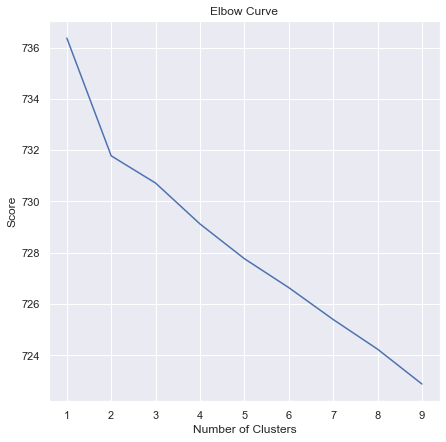

Plotting the Elbow curve took:1.8s 


In [97]:
import seaborn as sns
import time
sns.set(rc= {'figure.figsize': (7,7)})
number_of_clusters = range(1,10)

t0= time.time()
kmeans = [KMeans(n_clusters=i,max_iter=1000,random_state=33,n_jobs=-1) for i in number_of_clusters]
score = [-1*kmeans[i].fit(v1).score(v1) for i in range(len(kmeans))]
t1= time.time()

plt.plot((number_of_clusters),score)
plt.xlabel('Number of Clusters')
plt.xticks(number_of_clusters)
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

print("Plotting the Elbow curve took:{:.1f}s ".format(t1-t0))

#### NMF

In [98]:
from sklearn.decomposition import NMF

In [99]:
# function to display topics with words


def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
#         else:
#             print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
    

def display_top(model, feature_names, no_top_words, topic_names=None):
    
    my_dict = {'topic_0':'','topic_1':'','topic_2':'','topic_3':'','topic_4':''}
    ctr = 0
    for ix, topic in enumerate(model.components_):
                #if not topic_names or not topic_names[ix]:
#             print("\nTopic ", ix)
        txt = ",".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
        my_dict['topic_'+str(ctr)] = txt
        ctr+=1
#         print('words are::: ',txt)
    return my_dict

In [100]:
topic_nums = list(np.arange(1, 6))

#nmf_models = []
for num in topic_nums:
    nmf = NMF(num)
    #nmf_models.append(nmf)
    nmf.fit_transform(v1)
    display_topics(nmf, tfidf.get_feature_names(), 10)
    print("------------------------------------------")

/Users/mada/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/Users/mada/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/Users/mada/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "



Topic  0
الهوى, الدهر, الناس, يوم, قلبي, الزمان, الدنيا, الارض, الحب, الليل
------------------------------------------

Topic  0
الناس, الدهر, الدنيا, الزمان, خير, الملك, الورى, الموت, الفضل, يوم

Topic  1
الهوى, قلبي, الحب, القلب, الليل, الصبا, يوم, الدجى, قلب, عيني
------------------------------------------

Topic  0
الدهر, الناس, الزمان, الورى, خير, الفضل, يوم, الملك, العلا, الارض

Topic  1
الهوى, قلبي, الحب, القلب, الليل, يوم, الصبا, قلب, الدجى, العين

Topic  2
الدنيا, الموت, عيش, الحياة, انما, ثلاثا, عيشة, طاب, العمر, طلق
------------------------------------------

Topic  0
الناس, الدنيا, خير, الورى, الارض, الموت, الملك, العلا, يوم, الدين

Topic  1
الهوى, قلبي, الحب, القلب, الليل, الصبا, يوم, الدجى, العين, قلب

Topic  2
الدهر, الفضل, اكل, الشمس, الراي, وقع, الشيب, تعود, الايام, مرض

Topic  3
الزمان, العلوم, ذنب, الجمال, قوم, كثيرة, شمل, العشاق, عرضت, نفسك
------------------------------------------


/Users/mada/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/Users/mada/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "



Topic  0
الناس, خير, الورى, العلا, الارض, الملك, يوم, الدين, العلم, رب

Topic  1
الهوى, قلبي, الحب, القلب, الليل, الصبا, يوم, الدجى, قلب, العين

Topic  2
الزمان, العلوم, ذنب, الجمال, قوم, كثيرة, شمل, العشاق, نفسك, عرضت

Topic  3
الدنيا, الموت, عيش, انما, ثلاثا, عيشة, الحياة, طاب, العمر, طلق

Topic  4
الدهر, الفضل, اكل, الشمس, الراي, وقع, تعود, الشيب, الايام, مرض
------------------------------------------


In [101]:
nmf_model = NMF(5)
doc_topic = nmf_model.fit_transform(v1)

/Users/mada/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [102]:
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = ["component_1","component_2","component_3","component_4","component_5"],
             columns = tfidf.get_feature_names())
topic_word

,اباك,ابالي,اباه,ابت,ابتداء,ابتسام,ابتسمت,ابتغي,ابحر,ابد,...,يود,يودي,يوسف,يولي,يوم,يوما,يومك,يومل,يومه,يومي
component_1,0.013,0.025,0.018,0.000,0.000,0.000,0.003,0.017,0.001,0.004,...,0.000,0.010,0.003,0.004,0.197,0.104,0.009,0.002,0.013,0.006
component_2,0.004,0.012,0.000,0.023,0.004,0.010,0.010,0.000,0.000,0.004,...,0.009,0.003,0.028,0.004,0.158,0.080,0.000,0.004,0.000,0.007
component_3,0.000,0.000,0.000,0.000,0.000,0.001,0.001,0.000,0.000,0.000,...,0.000,0.000,0.008,0.000,0.000,0.056,0.000,0.000,0.000,0.000
component_4,0.001,0.000,0.000,0.022,0.000,0.000,0.005,0.018,0.006,0.000,...,0.000,0.000,0.000,0.002,0.002,0.098,0.005,0.003,0.006,0.002
component_5,0.000,0.000,0.000,0.013,0.000,0.004,0.000,0.000,0.024,0.001,...,0.003,0.001,0.003,0.000,0.065,0.004,0.011,0.000,0.001,0.014


In [103]:
display_topics(nmf_model, tfidf.get_feature_names(),10)


Topic  0
الناس, خير, الورى, العلا, الارض, الملك, يوم, الدين, العلم, رب

Topic  1
الهوى, قلبي, الحب, القلب, الليل, الصبا, يوم, الدجى, قلب, العين

Topic  2
الزمان, العلوم, ذنب, الجمال, قوم, كثيرة, شمل, العشاق, نفسك, عرضت

Topic  3
الدنيا, الموت, عيش, انما, ثلاثا, عيشة, الحياة, طاب, العمر, طلق

Topic  4
الدهر, الفضل, اكل, الشمس, الراي, وقع, تعود, الشيب, الايام, مرض


 -----

# PCA

In [191]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca_result = pca.fit_transform(poem_df)

# df['pca-one'] = pca_result[:,0]
# df['pca-two'] = pca_result[:,1] 
# df['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.00954484 0.00427866 0.00379004 0.00373303 0.00354298]


In [192]:
len(pca_result)

749

# TSNE

In [199]:
tsne_model = TSNE(n_components=2, random_state=0)
results = tsne_model.fit_transform(poem_df) 

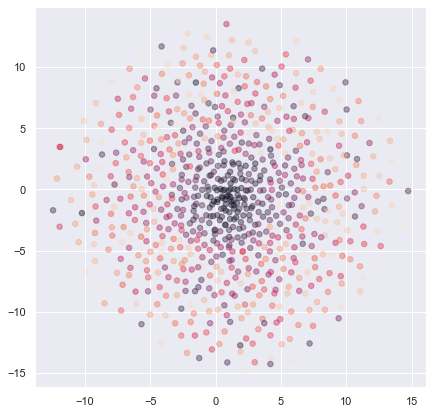

In [201]:
def get_coords(matrix2D):
    x = []
    y = []
    for r in matrix2D:
        x.append(r[0])
        y.append(r[1])
    return x, y

x, y = get_coords(results)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=700, random_state=0).fit(poem_vect)

# Scatter plot with colouring by kmeans labels:
plt.scatter(x, y, alpha=0.4, c=kmeans.labels_, marker='o', s=30);

In [89]:
no_topics = 20
nmf2_model = NMF(n_components=no_topics,init='random').fit(v1)
nmf2_W = nmf2_model.transform(v1)
nmf2_H = nmf2_model.components_

/Users/mada/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [90]:
tsne_tech_model = TSNE(n_components=2, random_state=0)
results = tsne_tech_model.fit_transform(nmf2_W) 

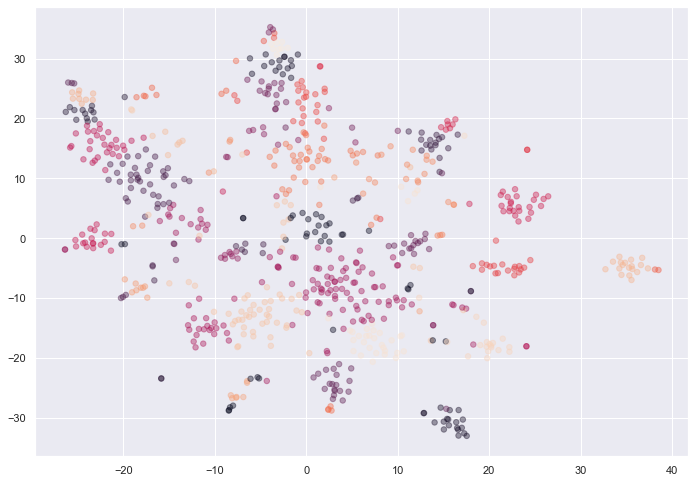

In [91]:
def get_coords(matrix2D):
    x = []
    y = []
    for r in matrix2D:
        x.append(r[0])
        y.append(r[1])
    return x, y

x, y = get_coords(results)

from sklearn.cluster import KMeans
kmeans2 = KMeans(n_clusters=50, random_state=0).fit(nmf2_W)

# Scatter plot with colouring by kmeans labels:
plt.scatter(x, y, alpha=0.4, c=kmeans2.labels_, marker='o', s=30);

# TSNE 2

In [204]:
tsne_model = TSNE(n_components=2, random_state=0)
results = tsne_model.fit_transform(pca_result) 

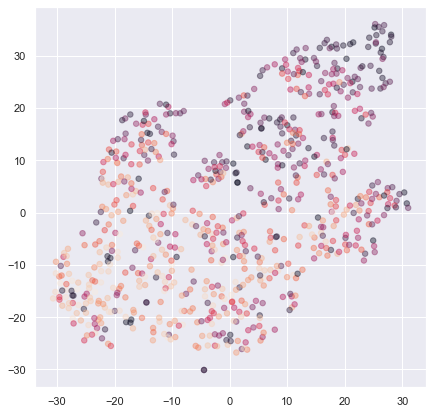

In [207]:
def get_coords(matrix2D):
    x = []
    y = []
    for r in matrix2D:
        x.append(r[0])
        y.append(r[1])
    return x, y

x, y = get_coords(results)


kmeans2 = KMeans(n_clusters=700, random_state=0).fit(pca_result)

# Scatter plot with colouring by kmeans labels:
plt.scatter(x, y, alpha=0.4, c=kmeans2.labels_, marker='o', s=30);

--------

## Topic Models As Feature Vectors to Supervised Classifiers

In [149]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report,confusion_matrix,f1_score
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [138]:
poem_data.head()

,العصر,الشاعر,الديوان,القافية,البحر,الشطر الايسر,الشطر الايمن,البيت,target,char_length,token_length,len
0,قبل الإسلام,عمرو بنِ قُمَيئَة,الديوان الرئيسي,د,الطويل,وَأَن تَجمَعا شَملي وَتَنتَظِرا غَدا,خَليلَيَّ لا تَستَعجِلا أَن تَزَوَّدا,خَليلَيَّ لا تَستَعجِلا أَن تَزَوَّدا وَأَن تَجمَعا شَملي وَتَنتَظِرا غَدا,القديم,77,13,10
1,قبل الإسلام,عمرو بنِ قُمَيئَة,الديوان الرئيسي,د,الطويل,وَلا سُرعَتي يَوماً بِسابِقَةِ الرَدى,فَما لَبَثٌ يَوماً بِسابِقٍ مَغنَمٍ,فَما لَبَثٌ يَوماً بِسابِقٍ مَغنَمٍ وَلا سُرعَتي يَوماً بِسابِقَةِ الرَدى,القديم,76,13,10
2,قبل الإسلام,عمرو بنِ قُمَيئَة,الديوان الرئيسي,د,الطويل,وَتَستَوجِبا مَنّاً عَلَيَّ وَتُحمَدا,وَإِن تُنظِراني اليَومَ أَقضِ لُبانَةً,وَإِن تُنظِراني اليَومَ أَقضِ لُبانَةً وَتَستَوجِبا مَنّاً عَلَيَّ وَتُحمَدا,القديم,79,12,9
3,قبل الإسلام,عمرو بنِ قُمَيئَة,الديوان الرئيسي,د,الطويل,تُؤامِرُني سِرّاً لِأَصرِمَ مَرثَدا,لَعَمرُكَ ما نَفسٌ بِجِدٍ رَشيدَةٍ,لَعَمرُكَ ما نَفسٌ بِجِدٍ رَشيدَةٍ تُؤامِرُني سِرّاً لِأَصرِمَ مَرثَدا,القديم,73,12,9
4,قبل الإسلام,عمرو بنِ قُمَيئَة,الديوان الرئيسي,د,الطويل,وَأَفرَعَ في لَومي مِراراً وَأَصعَدا,وَإِن ظَهَرَت مِنهُ قَوارِصُ جَمَّةٌ,وَإِن ظَهَرَت مِنهُ قَوارِصُ جَمَّةٌ وَأَفرَعَ في لَومي مِراراً وَأَصعَدا,القديم,76,13,10


In [139]:
poem = poem_data.sample(749)

In [140]:
le = LabelEncoder()
data = data.copy()
data['target_encoded']= le.fit_transform(poem['target'])

In [141]:
X = np.array(nmf_features)

y = np.array(data['target_encoded'])

In [142]:
train = pd.DataFrame(X, columns=['Topic1', 'Topic2', 'Topic3','Topic3','Topic4'])
train['target'] = poem_data['target']
train['target_encoded'] = y
train.head()

,Topic1,Topic2,Topic3,Topic3,Topic4,target,target_encoded
0,0.016490,0.002329,0.067524,0.000000,0.000000,القديم,5
1,0.110137,0.134444,0.011335,0.035043,0.018391,القديم,5
2,0.000000,0.120004,0.000000,0.047017,0.000000,القديم,1
3,0.000000,0.099476,0.000000,0.000000,0.005010,القديم,1
4,0.005594,0.000000,0.061373,0.000000,0.000000,القديم,1


In [143]:
X.shape

(749, 5)

In [144]:
#---- split the dataset

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.01,
                                                    random_state = 42, 
                                                    stratify = y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.01, random_state=42)

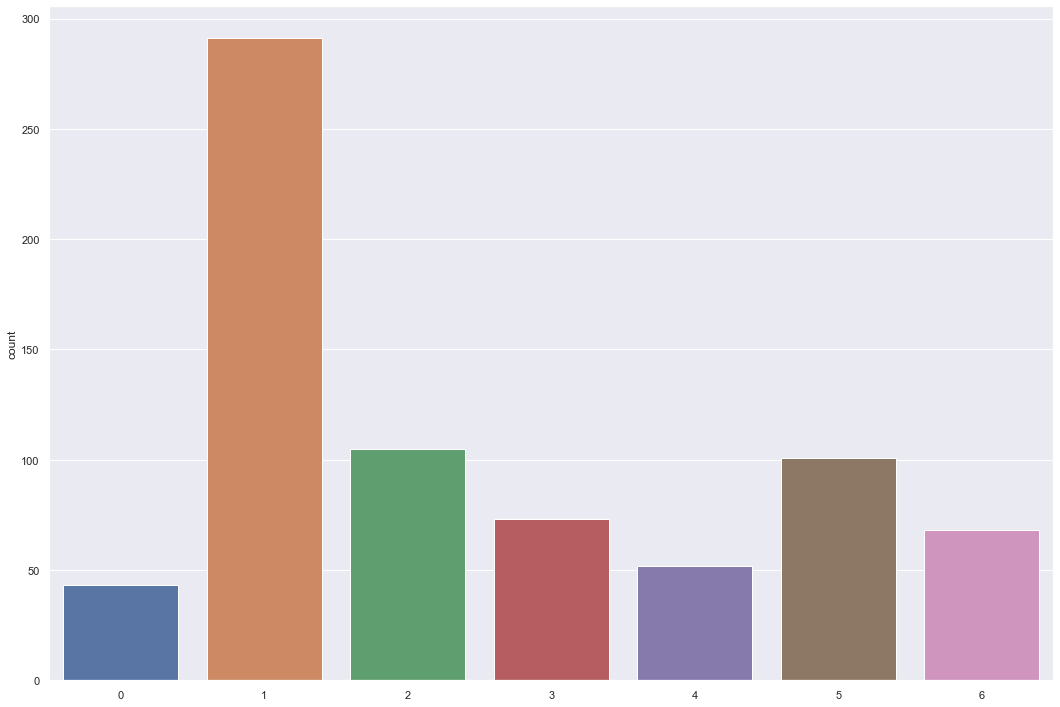

In [145]:
sns.countplot(x = y_train);

# Handling Data Imbalanced

The total observations before: 733
The total observations after: 2037


<AxesSubplot:ylabel='count'>

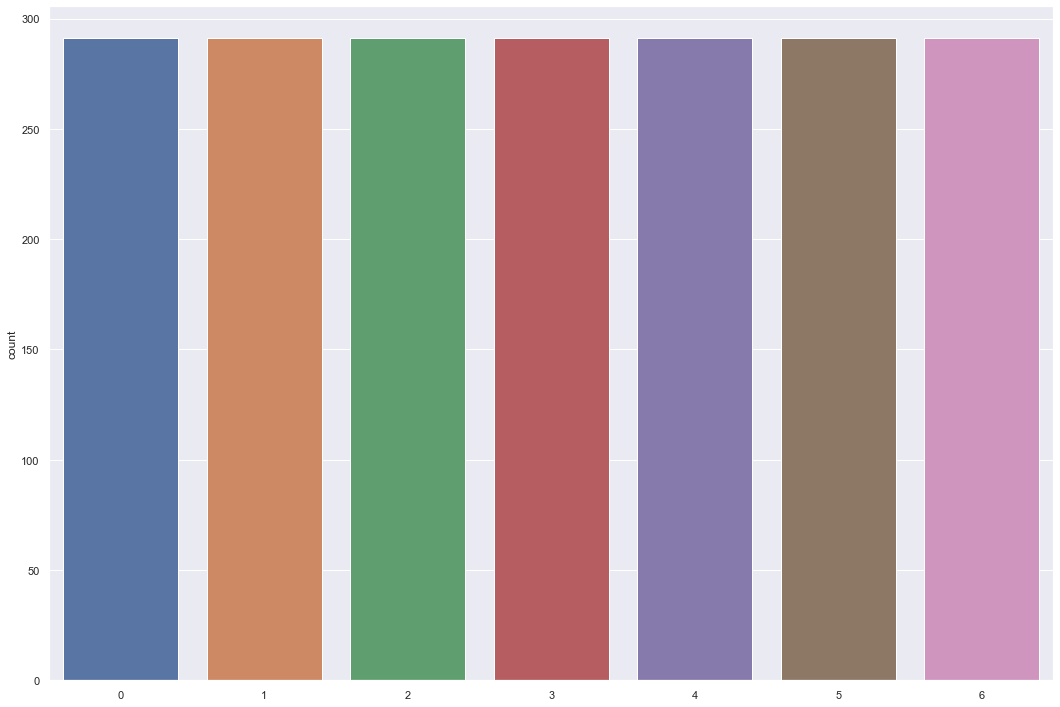

In [146]:
sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("The total observations before:", len(y_train))
print("The total observations after:", len(y_train_res))

sns.countplot(x = y_train_res)

# Classifiers

In [152]:
def get_results(modelname):
    model = modelname.fit(X_train_res,y_train_res)
    pred=model.predict(X_val)
    print()
    print(classification_report(y_val, pred))
    cnf_matrix = confusion_matrix(y_val, pred)
    sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5, fmt='g')
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()

# XGB

/Users/mada/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:33:39] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.50      0.33      0.40         3
           6       0.00      0.00      0.00         0

    accuracy                           0.12         8
   macro avg       0.07      0.05      0.06         8
weighted avg       0.19      0.12      0.15         8



/Users/mada/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mada/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mada/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mada/opt/anaconda3/lib/

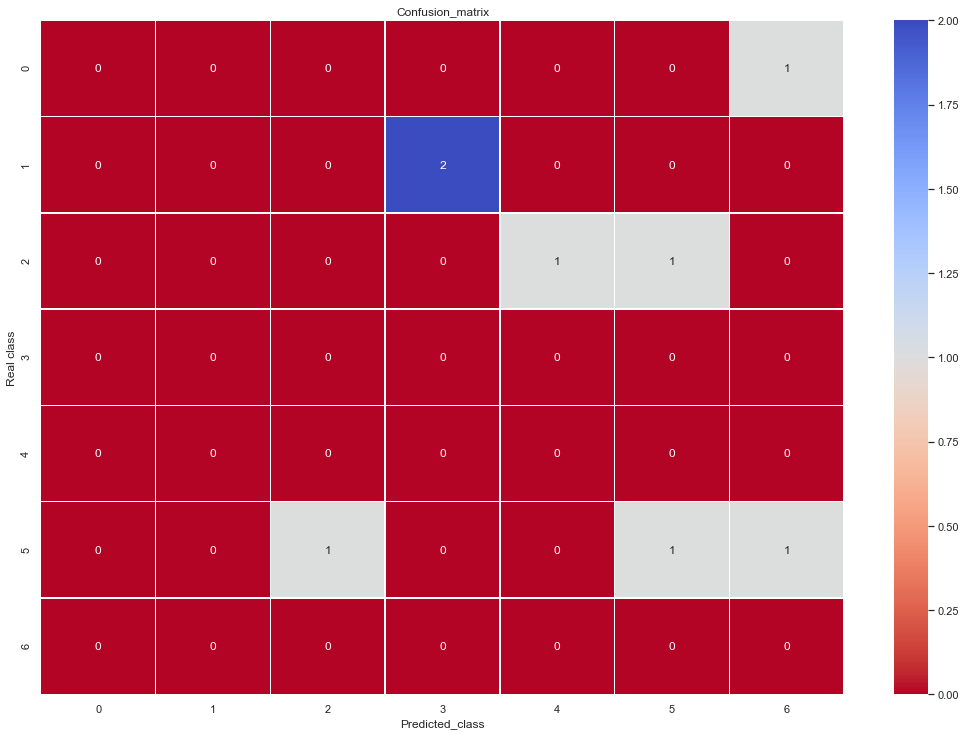

In [154]:
get_results(XGBClassifier());

# Gaussain Naive Bayes


              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1

    accuracy                           0.12         8
   macro avg       0.08      0.17      0.11         8
weighted avg       0.06      0.12      0.08         8



/Users/mada/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mada/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mada/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mada/opt/anaconda3/lib/

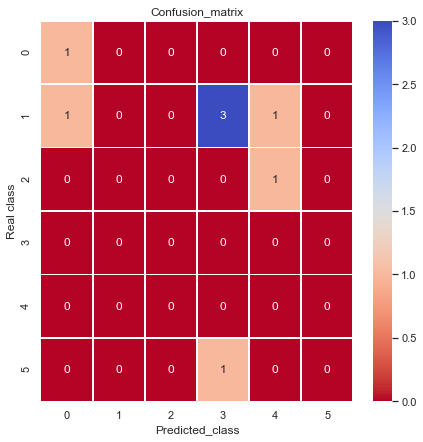

In [182]:
get_results(GaussianNB())

## Support vector machines (SVMs)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       5.0
           2       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       0.0
           6       0.00      0.00      0.00       1.0

    accuracy                           0.00       8.0
   macro avg       0.00      0.00      0.00       8.0
weighted avg       0.00      0.00      0.00       8.0



/Users/mada/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mada/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mada/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mada/opt/anaconda3/lib/

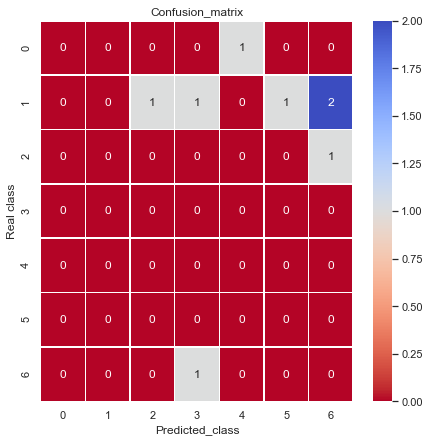

In [183]:
get_results(svm.SVC())

# Random Forest


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.40      0.57         5
           2       0.33      1.00      0.50         1
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1

    accuracy                           0.38         8
   macro avg       0.22      0.23      0.18         8
weighted avg       0.67      0.38      0.42         8



/Users/mada/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mada/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mada/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mada/opt/anaconda3/lib/

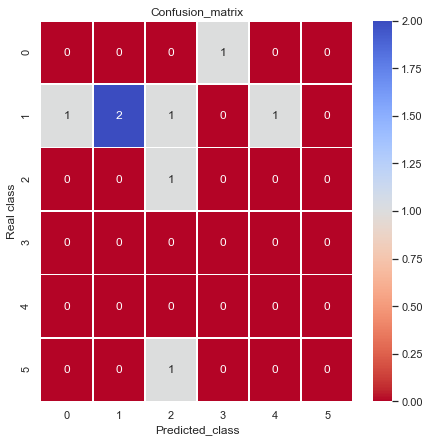

In [184]:
get_results(RandomForestClassifier())

# Multinomial Naive Bayes


              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1

    accuracy                           0.12         8
   macro avg       0.08      0.17      0.11         8
weighted avg       0.06      0.12      0.08         8



/Users/mada/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mada/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mada/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mada/opt/anaconda3/lib/

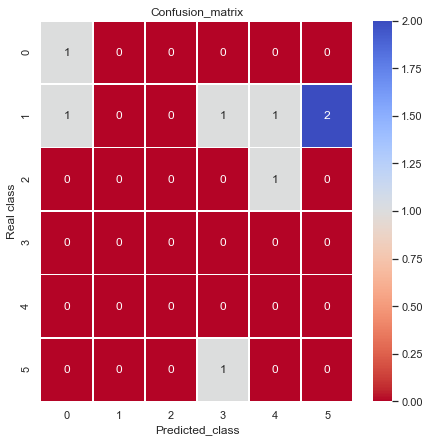

In [185]:
get_results(MultinomialNB())

# Decision Tree


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.20      0.33         5
           2       0.33      1.00      0.50         1
           3       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1

    accuracy                           0.25         8
   macro avg       0.22      0.20      0.14         8
weighted avg       0.67      0.25      0.27         8



/Users/mada/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mada/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mada/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mada/opt/anaconda3/lib/

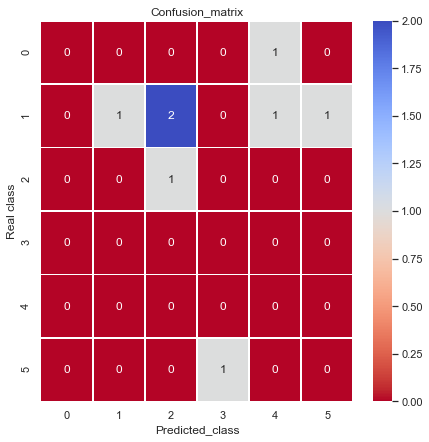

In [186]:
get_results(DecisionTreeClassifier())

# Logistic Regression


              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1

    accuracy                           0.12         8
   macro avg       0.08      0.17      0.11         8
weighted avg       0.06      0.12      0.08         8



/Users/mada/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mada/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mada/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mada/opt/anaconda3/lib/

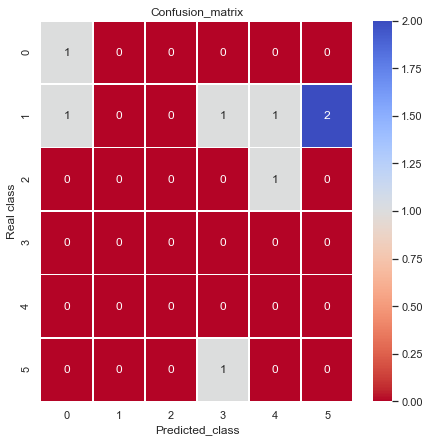

In [187]:
get_results(LogisticRegression())

# Saving The Model

In [91]:
# save the model
file = open('poem_arabic.pkl', 'wb')
pickle.dump(weather, file)

In [92]:
# open the model
model = open('poem_arabic.pkl','rb')
weather_project = pickle.load(model)